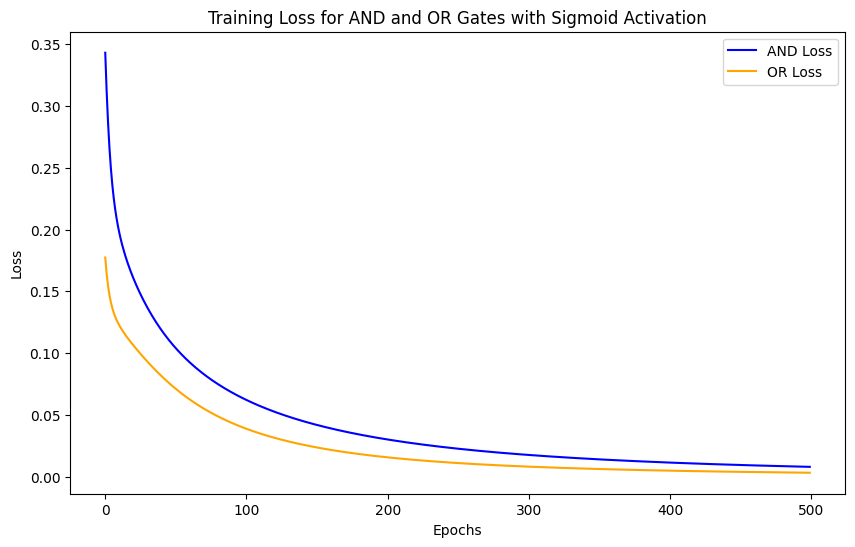


Training AND Gate Results with Sigmoid:
Inputs: [0 0], Target: 0, Output: 0.0
Inputs: [0 1], Target: 0, Output: 0.09
Inputs: [1 0], Target: 0, Output: 0.09
Inputs: [1 1], Target: 1, Output: 0.88

Training OR Gate Results with Sigmoid:
Inputs: [0 0], Target: 0, Output: 0.1
Inputs: [0 1], Target: 1, Output: 0.96
Inputs: [1 0], Target: 1, Output: 0.96
Inputs: [1 1], Target: 1, Output: 1.0

Testing AND Gate Results with Sigmoid:
Inputs: [0 0], Target: 0, Output: 0
Inputs: [0 1], Target: 0, Output: 0
Inputs: [1 0], Target: 0, Output: 0
Inputs: [1 1], Target: 1, Output: 1

Testing OR Gate Results with Sigmoid:
Inputs: [0 0], Target: 0, Output: 0
Inputs: [0 1], Target: 1, Output: 1
Inputs: [1 0], Target: 1, Output: 1
Inputs: [1 1], Target: 1, Output: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron(inputs, weights, bias, activation_func):
    weighted_sum = np.dot(inputs, weights) + bias
    return activation_func(weighted_sum)

def train_perceptron(X, y, activation_func, epochs=400, learning_rate=0.1):
    weights = np.random.rand(2) - 0.5
    bias = np.random.rand(1) - 0.5
    loss_history = []

    for epoch in range(epochs):
        total_loss = 0
        for inputs, target in zip(X, y):
            output = perceptron(inputs, weights, bias, activation_func)
            error = target - output

            # Update weights and bias
            weights += learning_rate * error * inputs
            bias += learning_rate * error

            # Calculate loss (Mean Squared Error)
            total_loss += error ** 2

        # Average loss for this epoch
        avg_loss = total_loss / len(y)
        loss_history.append(avg_loss)

    return weights, bias, loss_history

# Dataset for AND and OR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])   # AND gate
y_or = np.array([0, 1, 1, 1])    # OR gate

# Training parameters
epochs = 500
learning_rate = 0.1

# Train AND gate
weights_and, bias_and, loss_and = train_perceptron(X, y_and, sigmoid, epochs, learning_rate)

# Train OR gate
weights_or, bias_or, loss_or = train_perceptron(X, y_or, sigmoid, epochs, learning_rate)

# Plotting loss for AND and OR gates
plt.figure(figsize=(10, 6))
plt.plot(loss_and, label='AND Loss', color='blue')
plt.plot(loss_or, label='OR Loss', color='orange')
plt.title('Training Loss for AND and OR Gates with Sigmoid Activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to print training inputs and outputs
def print_training_results(X, y, weights, bias, activation_func, gate_name):
    print(f"\nTraining {gate_name} Gate Results with {activation_func.__name__.capitalize()}:")
    for inputs, target in zip(X, y):
        output = perceptron(inputs, weights, bias, activation_func)
        print(f"Inputs: {inputs}, Target: {target}, Output: {round(output.item(), 2)}")

# Print training results for AND and OR gates
print_training_results(X, y_and, weights_and, bias_and, sigmoid, "AND")
print_training_results(X, y_or, weights_or, bias_or, sigmoid, "OR")

# Function to convert continuous output to binary output
def binary_output(output):
    return 1 if output > 0.5 else 0

# Testing and printing results for AND and OR gates
def print_testing_results(X, y, weights, bias, activation_func, gate_name):
    print(f"\nTesting {gate_name} Gate Results with {activation_func.__name__.capitalize()}:")
    for inputs, target in zip(X, y):
        output = perceptron(inputs, weights, bias, activation_func)
        print(f"Inputs: {inputs}, Target: {target}, Output: {binary_output(output)}")

# Print testing results for AND and OR gates
print_testing_results(X, y_and, weights_and, bias_and, sigmoid, "AND")
print_testing_results(X, y_or, weights_or, bias_or, sigmoid, "OR")